## ARIMA Time Series Forecasts

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
# from pyramid.arima import auto_arima # pip install pyramid-arima

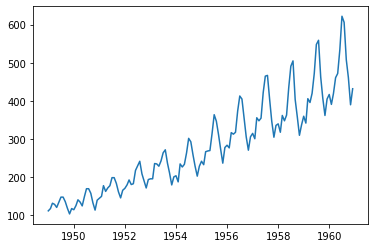

In [5]:
custom_date_parser = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('../datasets/air_passengers.csv', parse_dates=['Month'],
                   index_col='Month', date_parser=custom_date_parser)
series = base['#Passengers']

plt.plot(series)

In [6]:
# p = Números dos termos auto-regressivos
# q = Número das médias móveis (move_average)
# d = Número de diferenças não-sazionais
model = ARIMA(series, order=(2, 1, 2))
trained_model = model.fit()

C:\Users\leand\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\leand\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [7]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.710
Date:                Wed, 11 Dec 2019   AIC                           1344.043
Time:                        23:07:02   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5310      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9101      0.065    -29.535      0.000      -2.037      -1.783
ma.L2.D.#Passengers     1.0000      0.068     14.810      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0000           -0.0479
MA.2            0.9551           +0.2964j            1.0000            0.0479
-----------------------------------------------------------------------------
"""

#### Forecasts

In [9]:
predictions = trained_model.forecast(steps=12)[0]

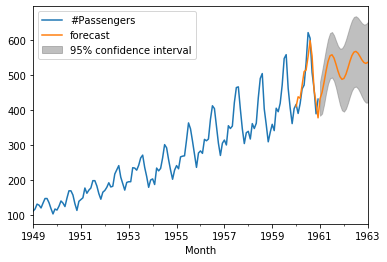

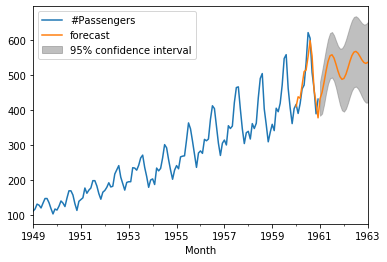

In [33]:
axis = series.plot()
trained_model.plot_predict('1960-01-01', '1963-01-01',
                           ax=axis, plot_insample=False)

#### Auto ARIMA

In [ ]:
# auto_model = auto_arima(series, m=12, seasonal=True, trace=True)
# auto_model.summary()
# predictions_next_12 = auto_model.predict(n_periods=12)
